In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lmfit import Model
from scipy.stats import linregress
import seaborn as sns

from LSB_07 import contact_resistance as cr

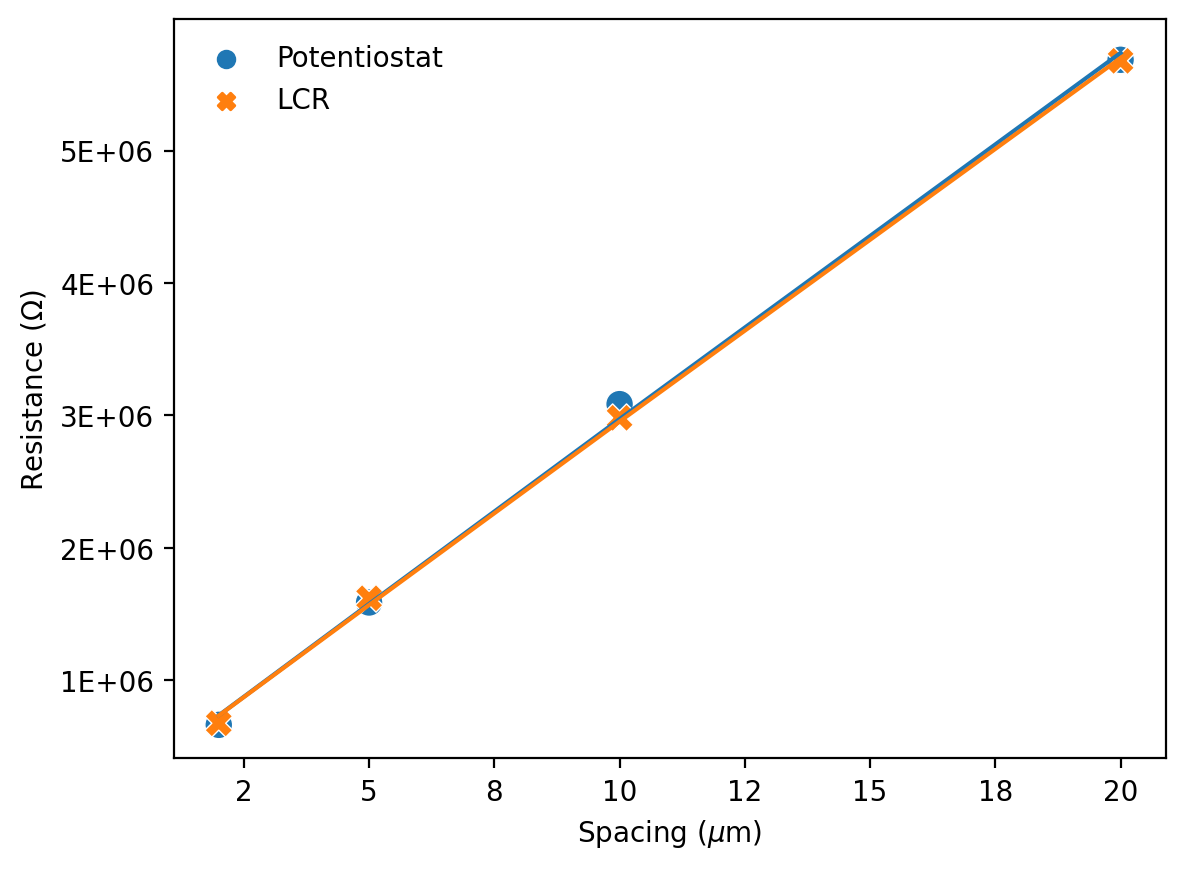

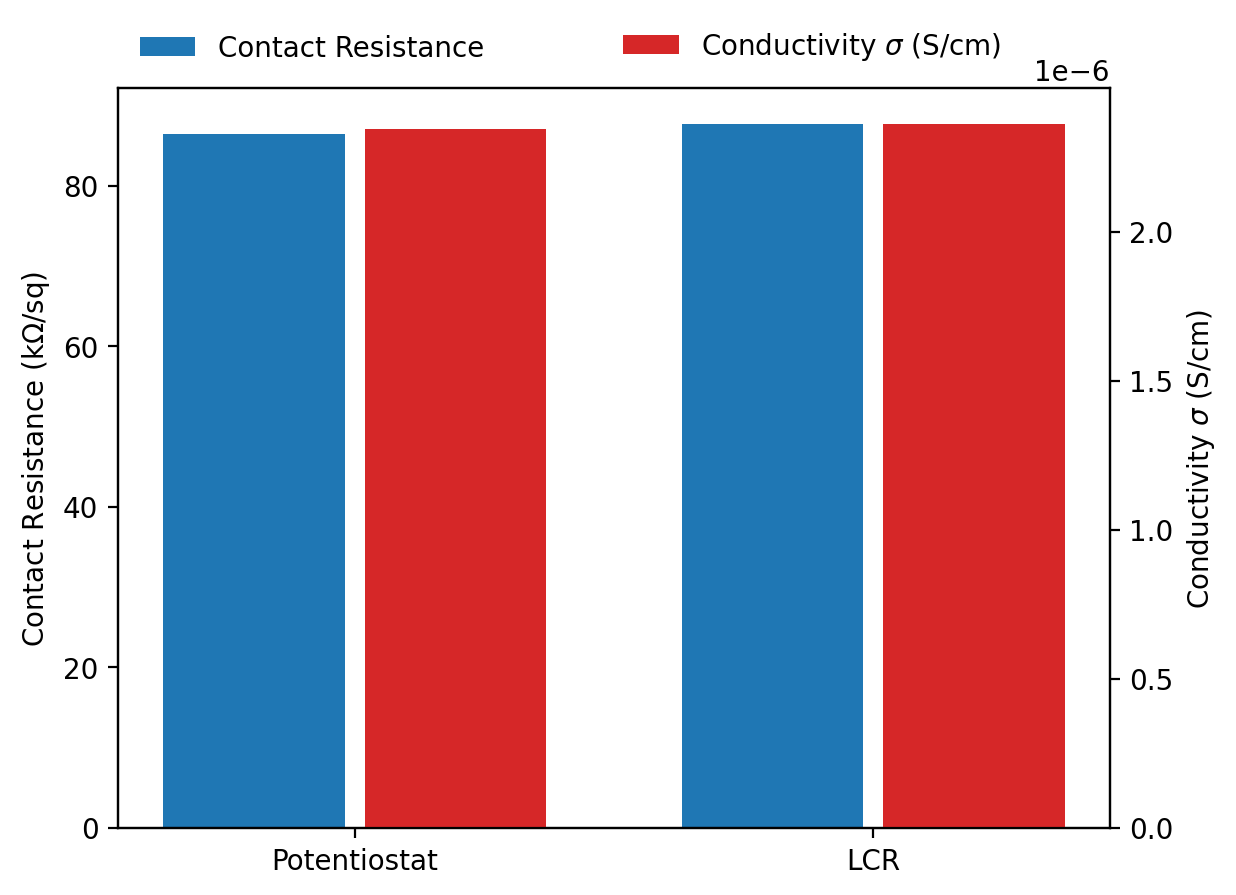

In [9]:
path = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Contact Resistance\LSB_07\0G_20'
path2 = r'C:\Users\lopezb41\OneDrive - imec\Documents\Experiments\Data\Contact Resistance\LSB_07\0G_20_LCR'
paths = [path, path2]
names = ['Potentiostat', 'LCR']
col2 = ['Spacing (cm)', 'Resistance ($\Omega$)', 'Structure', 'Sample']
col3 = ['Sheet resistance ($\Omega$)', 'Contact Resistance (k$\Omega$/sq)', 'Conductivity $\sigma$ (S/cm)', 'Name']
all_r = pd.DataFrame()
v = []
fig, ax = plt.subplots(dpi = 200, facecolor = 'white')
n = 0
for i in paths:
    r, values = cr.resistance(i, 80, names[n])
    all_r = pd.concat([all_r, r], ignore_index = True)
    v.append(values)
    n += 1
sns.scatterplot(data = all_r, x = col2[0], y = col2[1], hue = col2[3], style = col2[3], s = 100, linewidth = .5)
sns.move_legend(ax, 0, frameon = False, title = None)
ax.xaxis.set_major_formatter(lambda x, pos: '{:.0f}'.format(x * 1e4))
ax.yaxis.set_major_formatter(lambda x, pos: '{:.0G}'.format(x))
ax.set_xlabel('Spacing ($\mu$m)')
val = pd.DataFrame(v, columns = col3)
# plt.xlim(0,0.0003)
# plt.ylim(6e5, 8e5)

fig, ax = plt.subplots(dpi = 200, facecolor = 'white')
ax2 = ax.twinx()
q = np.arange(len(names))
w = 0.35
ax.bar(q - w/1.8, val[col3[1]], w, label = col3[1][:-14], color = 'tab:blue')
ax2.bar(q + w/1.8, val[col3[2]], w, label = col3[2], color = 'tab:red')

ax.set_ylabel(col3[1])
ax.legend(bbox_to_anchor=(0.2, 1.02), loc='lower center', borderaxespad=0, frameon = False)
ax2.set_ylabel(col3[2])
ax2.legend(bbox_to_anchor=(0.7, 1.02), loc='lower center', borderaxespad=0, frameon = False)
ax.set_xticks([0,1])
ax.set_xticklabels(names)

ax.yaxis.set_major_formatter(lambda x, pos: '{:.0f}'.format(x/1000))
# ax2.yaxis.set_major_formatter(lambda x, pos: '{:.0G}'.format(x))

In [10]:
print(np.version.version)

1.24.1
